In [1]:
#!/usr/bin/env python
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [2]:
import wuml 
from wplotlib import scatter

In [3]:
wuml.set_terminal_print_options(precision=3)
data = wuml.make_moons(n_samples=1500)

Use flow to model the data with a generative model

	epoch: 199, Avg Loss: 0.4663, patience: 47

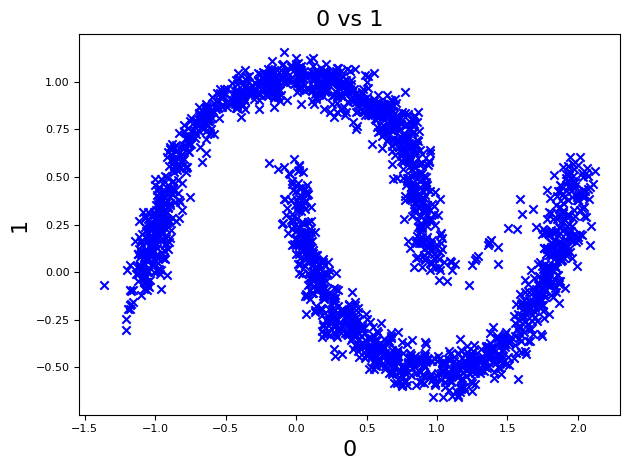

In [4]:
Pᵳ = wuml.flow(data, max_epochs=200, num_flows=10, network_width=1024)
probᵳ = Pᵳ(data)
samplesᵳ = Pᵳ.generate_samples(2000)
samplesᵳ.plot_2_columns_as_scatter(0, 1)
Pᵳ.save('flow.model')

after saving the model, reload this model and generate samples based on it

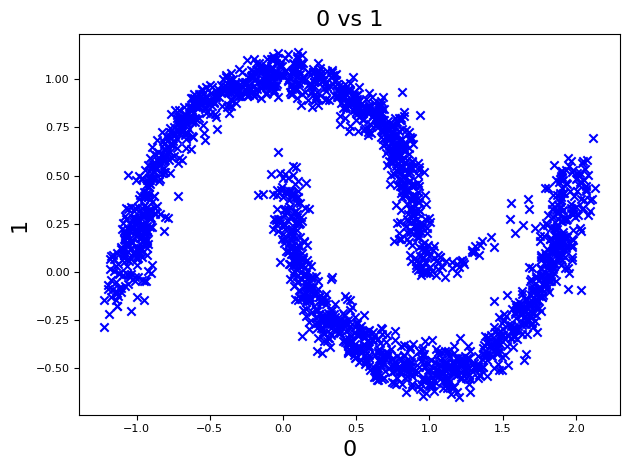

In [5]:
Pᵳ = wuml.flow(data, load_model_path='flow.model')
samplesᵳ = Pᵳ.generate_samples(2000)
probᵳ = Pᵳ(data)
samplesᵳ.plot_2_columns_as_scatter(0, 1)

compare flow to KDE models

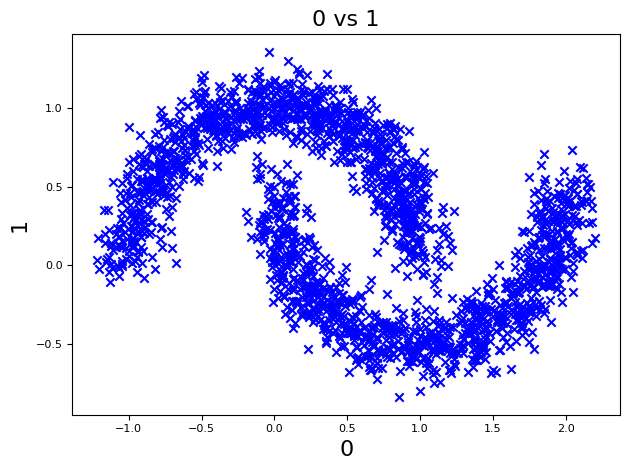

In [6]:
Pᴋ = wuml.KDE(data)
probᴋ = Pᴋ(data)
samplesᴋ = Pᴋ.generate_samples(2000)
samplesᴋ.plot_2_columns_as_scatter(0, 1)

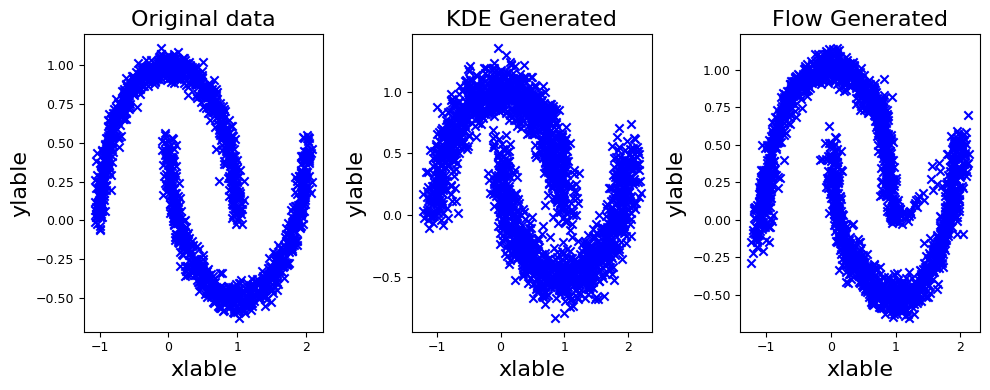

In [7]:
S = scatter(data.X[:,0], data.X[:,1], title='Original data', subplot=131, figsize=(10,4))
scatter(samplesᴋ.X[:,0], samplesᴋ.X[:,1], title='KDE Generated', subplot=132)
scatter(samplesᵳ.X[:,0], samplesᵳ.X[:,1], title='Flow Generated', subplot=133)
S.show()